In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000750686"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000750686
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,CAMDEN NATIONAL CORP
Ticker,CAC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,39.0,2.890692e+01,3.845485e+00,21.78,2.603500e+01,28.56,3.088500e+01,37.43
interest income,63.0,2.708917e+07,5.805350e+06,17340000.00,2.251500e+07,26324000.00,3.205600e+07,42009000.00
net income,63.0,6.298683e+06,3.920732e+06,-8020000.00,5.070000e+06,6194000.00,7.106500e+06,14273000.00
net interest income,63.0,1.950281e+07,5.765156e+06,11690000.00,1.716300e+07,18450000.00,1.978750e+07,31895000.00
provision for loan losses,63.0,7.803492e+05,6.984977e+05,-850000.00,3.495000e+05,643000.00,1.113500e+06,2852000.00


# Plots

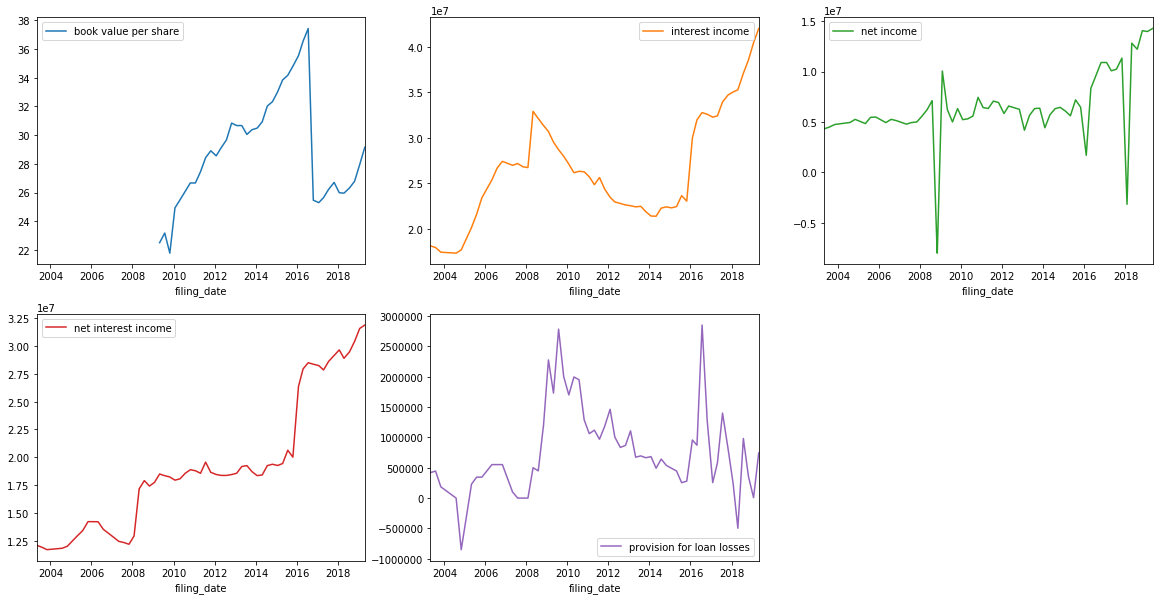

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000750686 book value per share       2003Q1 to 2008Q3: 23 periods  missing   
           book value per share                             2009Q3  missing   
           book value per share                             2010Q4  missing   
           book value per share                             2013Q1  missing   
           interest income             2003Q4 to 2004Q1: 2 periods  missing   
           interest income                                  2004Q4  missing   
           interest income                                  2005Q4  missing   
           interest income                                  2006Q4  missing   
           net income                  2003Q4 to 2004Q1: 2 periods  missing   
           net income                                       2004Q4  missing   
           net income                                       2005Q4  missing   
           net income                                       2006Q4  missing   
           net interest income         2003Q4 to 2004Q1: 2 periods  missing   
           net interest income                              2004Q4  missing   
           net interest income                              2005Q4  missing   
           net interest income                              2006Q4  missing   
           provision for loan losses   2003Q4 to 2004Q1: 2 periods  missing   
           provision for loan losses                        2004Q4  missing   
           provision for loan losses                        2005Q4  missing   
           provision for loan losses                        2006Q4  missing   
           provision for loan losses                        2013Q4  missing   
           provision for loan losses                        2014Q4  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000750686 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()